In [1]:
import sys
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
exp_folder = "exps"
identifiers = {
 "real (control)": "Control success rate (game: <class '__main__.SETGame'>, hints: 3):",
 "cf (control)": "Control success rate (game: <class '__main__.CounterfactualSetGame'>, hints: 3):",
 "real (h=2)": "Success rate (game: <class '__main__.SETGame'>, hints: 2):",
 "real (h=1)": "Success rate (game: <class '__main__.SETGame'>, hints: 1):",
 "real (h=0)": "Success rate (game: <class '__main__.SETGame'>, hints: 0):", 
 "cf (h=2)": "Success rate (game: <class '__main__.CounterfactualSetGame'>, hints: 2):", 
 "cf (h=1)": "Success rate (game: <class '__main__.CounterfactualSetGame'>, hints: 1):", 
 "cf (h=0)": "Success rate (game: <class '__main__.CounterfactualSetGame'>, hints: 0):", 
}

def read_results(model: str, cot=True):
    results = {}
    if cot:
        folder = f"{exp_folder}/cot_True"
    else:
        folder = f"{exp_folder}/cot_False" 
    with open(f"{folder}/{model}_100.log", "r") as f:
        lines = f.readlines()
        for line in lines:
            for k, v in identifiers.items():
                if v in line:
                    value = line.split(":")[-1].split(',')[0]
                    results[k] = float(value) * 100
                    

    return results

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
results = {
    "GPT-4": read_results("gpt4"),
    "GPT-3.5": read_results("gpt3.5"),
    "Claude": read_results("claudev1.3"),
    "PaLM": read_results("palm_chat"),
}

In [5]:
results

{'GPT-4': {'real (control)': 100.0,
  'cf (control)': 96.0,
  'real (h=2)': 100.0,
  'cf (h=2)': 61.0},
 'GPT-3.5': {'real (control)': 77.0,
  'cf (control)': 78.0,
  'real (h=2)': 37.0,
  'cf (h=2)': 7.000000000000001},
 'Claude': {'real (control)': 59.0},
 'PaLM': {'real (control)': 76.0,
  'cf (control)': 52.0,
  'real (h=2)': 16.0,
  'cf (h=2)': 5.0}}

In [9]:
set_game_results = pd.DataFrame(results).reset_index()
set_game_results.rename(columns={"index": "test"}, inplace=True)
set_game_results.transpose()[[2, 3, 0 , 1]]

,2,3,0,1
test,real (h=2),cf (h=2),real (control),cf (control)
GPT-4,100.0,61.0,100.0,96.0
GPT-3.5,37.0,7.0,77.0,78.0
Claude,NaN,NaN,59.0,NaN
PaLM,16.0,5.0,76.0,52.0


In [10]:
set_game_results = set_game_results.melt(id_vars=["test"], var_name="model")

In [11]:
set_game_results

,test,model,value
0,real (control),GPT-4,100.0
1,cf (control),GPT-4,96.0
2,real (h=2),GPT-4,100.0
3,cf (h=2),GPT-4,61.0
4,real (control),GPT-3.5,77.0
5,cf (control),GPT-3.5,78.0
6,real (h=2),GPT-3.5,37.0
7,cf (h=2),GPT-3.5,7.0
8,real (control),Claude,59.0
9,cf (control),Claude,NaN


In [12]:
import sys
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np

In [22]:
cot_results = {
    "GPT-4": read_results("gpt4", cot=True),
    "GPT-3.5": read_results("gpt3.5", cot=True),
    "Claude": read_results("claudev1.3", cot=True),
    "PaLM": read_results("palm_chat", cot=True),
}
nocot_results = {
    "GPT-4": read_results("gpt4", cot=False),
    "GPT-3.5": read_results("gpt3.5", cot=False),
    "Claude": read_results("claudev1.3", cot=False),
    "PaLM": read_results("palm_chat", cot=False),
}

In [29]:
set_game_results = pd.DataFrame(cot_results).reset_index()
set_game_results.rename(columns={"index": "test"}, inplace=True)
set_game_results.transpose()[[2, 3, 4, 5, 6, 7]]

,2,3,4,5,6,7
test,real (h=2),cf (h=2),real (h=1),real (h=0),cf (h=1),cf (h=0)
GPT-4,100.0,61.0,24.0,6.0,15.0,3.0
GPT-3.5,37.0,7.0,7.0,0.0,1.0,0.0
Claude,64.0,35.0,10.0,4.0,5.0,1.0
PaLM,16.0,5.0,2.0,1.0,0.0,0.0


In [24]:
set_game_results = pd.DataFrame(nocot_results).reset_index()
set_game_results.rename(columns={"index": "test"}, inplace=True)
set_game_results.transpose()[[2, 3, 0 , 1]]

,2,3,0,1
test,real (h=2),cf (h=2),real (control),cf (control)
GPT-4,100.0,21.0,89.0,74.0
GPT-3.5,73.0,4.0,68.0,55.0
Claude,55.0,21.0,92.0,62.0
PaLM,29.0,6.0,47.0,49.0


In [36]:
#set dpi
plt.rcParams['figure.dpi'] = 300

def plots(cot_results, nocot_results, hints=2):
    models = ["GPT-4", "GPT-3.5", "PaLM", "Claude"]
    real_nocot_data = list(map(lambda model: nocot_results[model][f'real (h={hints})'], models))
    print(real_nocot_data)
    real_cot_data = list(map(lambda model: cot_results[model][f'real (h={hints})'], models))
    cf_nocot_data = list(map(lambda model: nocot_results[model][f'cf (h={hints})'], models))
    cf_cot_data = list(map(lambda model: cot_results[model][f'cf (h={hints})'], models))
    control_real_nocot_data =  list(map(lambda model: nocot_results[model][f'real (control)'], models))
    control_real_cot_data = list(map(lambda model: cot_results[model][f'real (control)'], models))
    control_cf_nocot_data =  list(map(lambda model: nocot_results[model][f'cf (control)'], models))
    control_cf_cot_data =  list(map(lambda model: cot_results[model][f'cf (control)'], models))

    NUM_SERIES = 2
    # don't need to change
    REAL_COLOR = "#3498DB"
    CF_COLOR = "#DB7734"
    BETWEEN_GROUP_SPACE = 0.2
    BETWEEN_BAR_SPACE_TO_BAR_RATIO = 1 / 3
    BAR_WIDTH = (1 - BETWEEN_GROUP_SPACE) / ((NUM_SERIES - 1) * BETWEEN_BAR_SPACE_TO_BAR_RATIO + NUM_SERIES)
    SPACE_WIDTH = BAR_WIDTH * BETWEEN_BAR_SPACE_TO_BAR_RATIO
    CONTROL_MARKER_LEN = BAR_WIDTH * 0.65 * 1.75
    # /don't need to change


    fig, axs = plt.subplots(1, len(models), sharey=True, figsize=(8, 3.5))
    for ax, model, rl_nocot, rl_cot, cf_nocot, cf_cot, c_rl_nocot, c_rl_cot, c_cf_nocot, c_cf_cot in zip(
        axs, models, real_nocot_data, real_cot_data, cf_nocot_data, cf_cot_data, control_real_nocot_data, control_real_cot_data, control_cf_nocot_data, control_cf_cot_data, strict=True
    ):
        left_pos = np.arange(2)
        right_pos = left_pos + BAR_WIDTH + SPACE_WIDTH

        ax.bar(left_pos[0], rl_nocot, width=BAR_WIDTH, color="white", edgecolor=REAL_COLOR, linewidth=2)
        ax.bar(left_pos[0] + BAR_WIDTH + SPACE_WIDTH, cf_nocot, width=BAR_WIDTH, color="white", edgecolor=CF_COLOR, linewidth=2)
        ax.bar(left_pos[1], rl_cot, width=BAR_WIDTH, color=REAL_COLOR, edgecolor=REAL_COLOR, linewidth=2)
        ax.bar(left_pos[1] + BAR_WIDTH + SPACE_WIDTH, cf_cot, width=BAR_WIDTH, color=CF_COLOR, edgecolor=CF_COLOR, linewidth=2)
        for pos, num, color in (
            (left_pos[0], c_rl_nocot, REAL_COLOR),
            (right_pos[0], c_cf_nocot, CF_COLOR),
            (left_pos[1], c_rl_cot, REAL_COLOR),
            (right_pos[1], c_cf_cot, CF_COLOR),
        ):
            ax.plot(pos, num, marker='o', markersize=3, color=color)
            ax.plot([pos - CONTROL_MARKER_LEN / 2, pos + CONTROL_MARKER_LEN / 2], [num, num], linestyle='-', color=color)
        ax.set_title(model)
        ax.set_xticks((left_pos[0], right_pos[0], left_pos[1], right_pos[1]))
        ax.set_xticklabels(("0", "1", "0", "1"))
        ax.set_ylim(0, 103)
        ax.spines[['right', 'top']].set_visible(False)
    legend_elements = [
        Patch(facecolor='none', edgecolor='gray', label='-CoT'),
        Patch(facecolor='gray', edgecolor='gray', label='+CoT'),
        Line2D([0], [0], marker='o', color='gray', label='Controls', markerfacecolor='gray', markersize=5),
    ]
    fig.legend(handles=legend_elements, loc='lower center', ncol=3)
    #fig._suplabels("Index From", {'name': '_supxlabel', 'x0': 0.5, 'y0': 0.08, 'ha': 'center', 'va': 'bottom', 'rotation': 0})
    # fig._suplabels("Accuracy", {'name': '_supylabel', 'x0': 0.04, 'y0': 0.5, 'ha': 'left', 'va': 'center', 'rotation': 'vertical', 'rotation_mode': 'anchor'})
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.18, wspace=0.15, hspace=0.35, top=0.85)
    # fig.suptitle(f"hints: {hints}")
    #plt.show()
    plt.savefig(f"set_game_{hints}.pdf", dpi=300)
    

[100.0, 73.0, 28.999999999999996, 55.00000000000001]


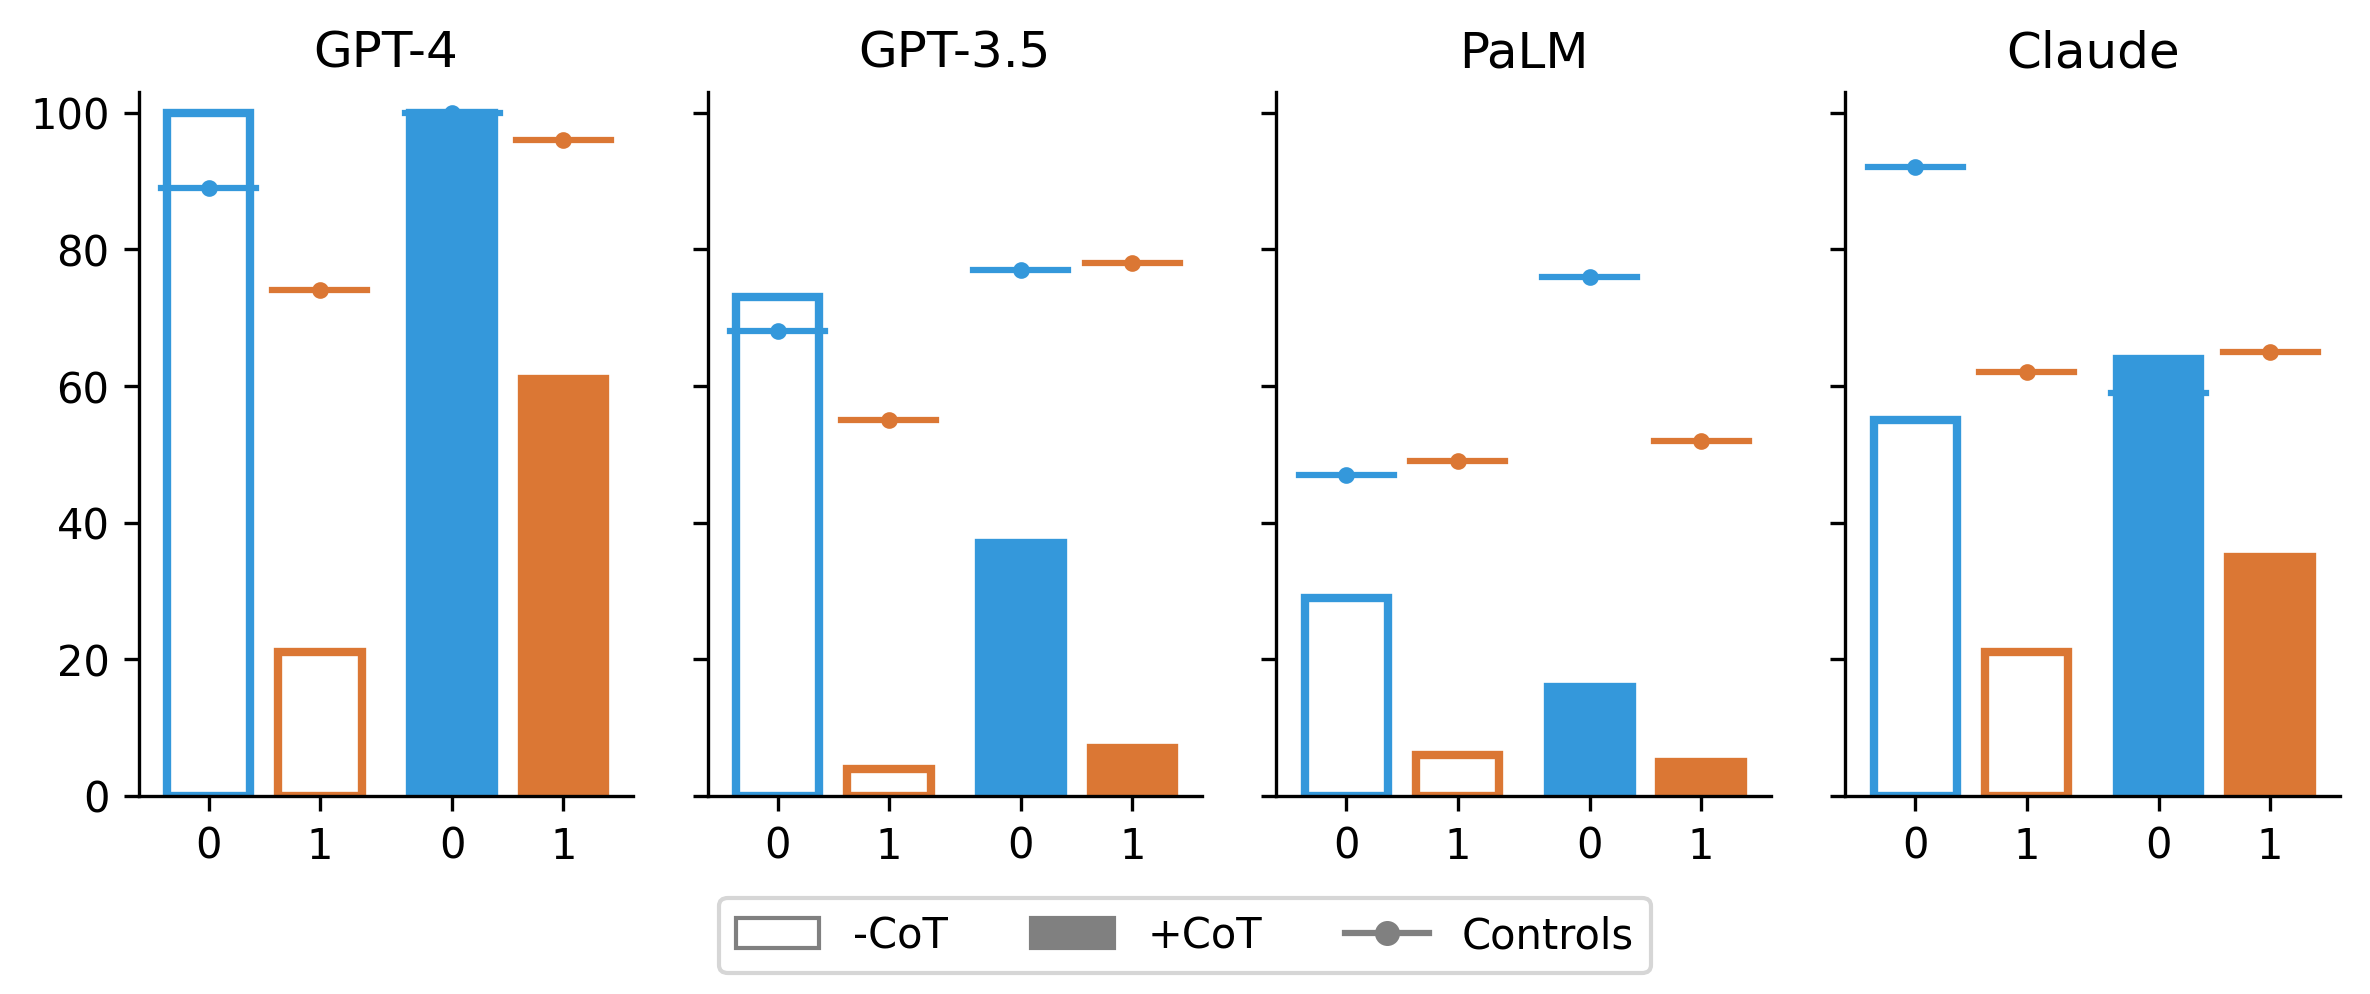

In [37]:
plots(cot_results, nocot_results, hints=2)

In [ ]:
plots(cot_results, nocot_results, hints=1)

In [ ]:
plots(cot_results, nocot_results, hints=0)